# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Dinnuhoni Trahutomo
- **Email:** dinnuhoni.trahutomo@gmail.com
- **ID Dicoding:** dinnuhoni23

## Latar Belakang Bisnis

Sistem berbagi sepeda telah menjadi inovasi dalam solusi transportasi yang mendukung mobilitas perkotaan, menawarkan pendekatan yang lebih ramah lingkungan, dan mendorong gaya hidup sehat. Pengguna dapat menyewa sepeda di satu lokasi dan mengembalikannya di lokasi lain, memberikan fleksibilitas dalam perjalanan. Dengan lebih dari 500 program berbagi sepeda di seluruh dunia dan memiliki lebih dari 500.000 sepeda, sistem ini berperan penting dalam mengurangi kemacetan lalu lintas, polusi udara, dan meningkatkan kesehatan masyarakat.

Data yang diperoleh dapat digunakan oleh para stakeholders, termasuk pengelola kota, operator transportasi, dan peneliti untuk membuat keputusan yang lebih baik terkait infrastruktur, perencanaan kota, dan penyediaan layanan publik untuk membuat analisis dan menentukan kelanjutan yang ingin di eksekusi di kemudian hari.

## Menentukan Pertanyaan Bisnis

- Apa faktor-faktor utama yang mempengaruhi tingkat penggunaan sepeda pada waktu-waktu tertentu?
- Bagaimana pola penggunaan sepeda bervariasi antara hari kerja dan akhir pekan?

## Import Semua Packages/Library yang Digunakan

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import warnings
warnings.filterwarnings('ignore')

## Import & Load Dataset

In [ ]:
df_day = pd.read_csv('https://raw.githubusercontent.com/dinnuhoni23/Bangkit_2024_Dicoding/refs/heads/main/day.csv')
df_hour = pd.read_csv('https://raw.githubusercontent.com/dinnuhoni23/Bangkit_2024_Dicoding/refs/heads/main/hour.csv')

### Display first few rows of the dataset

In [ ]:
df_day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [ ]:
df_hour.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


## **Data Wrangling**

### **Gathering Data**

### **Assessing Data**

### Day Information

In [ ]:
df_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


Insight:
Dataset ini terdiri dari 731 baris dan 16 kolom, dengan berbagai tipe data seperti integer, float, dan string. Fitur-fitur utamanya meliputi:

- instant: ID unik untuk setiap data.
- dteday: Tanggal observasi.
- season, yr, mnth, weekday, holiday, workingday: Variabel kategorikal terkait waktu.
- weathersit, temp, atemp, hum, windspeed: Variabel yang menjelaskan kondisi cuaca.
- casual, registered, cnt: Jumlah peminjaman sepeda oleh pengguna kasual dan terdaftar, dengan cnt sebagai total peminjaman.

Dataset ini merekam penggunaan sistem berbagi sepeda harian beserta kondisi cuaca terkait.

### Hour Information

In [ ]:
df_hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


Insight:
Dataset ini terdiri dari 17.379 baris dan 17 kolom, dengan tipe data yang mencakup integer, float, dan satu objek. Fitur utama dalam dataset ini antara lain:

- instant: ID unik untuk setiap data.
- dteday: Tanggal observasi.
- season, yr, mnth, hr, weekday, holiday, workingday: Variabel waktu dan hari terkait.
- weathersit, temp, atemp, hum, windspeed: Variabel kondisi cuaca.
- casual, registered, cnt: Jumlah peminjaman sepeda oleh pengguna kasual, terdaftar, dan total.

Dataset ini mencatat penggunaan sepeda setiap jamnya, termasuk faktor cuaca dan waktu.

### Day Analysis

In [ ]:
df_day.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [ ]:
print(f"Duplicate df_day: {df_day.duplicated().sum()}")

Duplicate df_day: 0


Dapat dilihat tidak ada nilai yang hilang (missing values) dalam dataset df_day. Setiap kolom memiliki 0 nilai yang kosong (NA/NaN), artinya semua data lengkap dan dapat digunakan untuk analisis lebih lanjut tanpa perlu proses imputasi atau pembersihan nilai yang hilang.

### Hour Analysis

In [ ]:
df_hour.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


In [ ]:
print(f"Duplicate df_hour: {df_hour.duplicated().sum()}")

Duplicate df_hour: 0


Dapat dilihat semua kolom memiliki 0 nilai hilang, artinya tidak ada data yang hilang di dalam dataset df_hour, sama seperti pada df_day. Ini menunjukkan bahwa dataset bersih dan siap untuk dianalisis lebih lanjut tanpa perlu penanganan khusus untuk nilai yang hilang.

### Day Statistics Description

In [ ]:
df_day.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


### Hour Statistics Description

In [ ]:
df_hour.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


### **Cleaning Data**

In [ ]:
drop_columns = ['instant', 'atemp', 'windspeed']
df_day.drop(columns=drop_columns, inplace=True)

1. Kolom `instant` tidak berguna untuk analisis karena hanya berisi nomor urut data dan tidak memiliki informasi signifikan untuk analisis, sehingga bisa dihapus tanpa mempengaruhi hasil analisis.
Kolom `atemp` tidak diperlukan karena redundan

2. `atemp` adalah suhu yang sudah disesuaikan, namun kita sudah memiliki kolom suhu asli (`temp`). Menggunakan keduanya bisa menimbulkan duplikasi, jadi lebih baik hanya menggunakan suhu asli (`temp`).
Kolom `windspeed` kurang relevan

3. Kecepatan angin (`windspeed`) tidak dianggap berpengaruh besar dalam analisis pengaruh cuaca terhadap penggunaan sepeda. Faktor-faktor lain seperti suhu dan musim lebih signifikan untuk dianalisis, sehingga kolom ini bisa dihapus agar fokus pada variabel yang lebih relevan.

---

Dengan menghapus kolom-kolom yang tidak memberikan kontribusi berarti, analisis data bisa lebih fokus pada variabel yang penting, meningkatkan efisiensi dan akurasi hasil analisis.

In [ ]:
df_day.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,casual,registered,cnt
0,2011-01-01,1,0,1,0,6,0,2,0.344167,0.805833,331,654,985
1,2011-01-02,1,0,1,0,0,0,2,0.363478,0.696087,131,670,801
2,2011-01-03,1,0,1,0,1,1,1,0.196364,0.437273,120,1229,1349
3,2011-01-04,1,0,1,0,2,1,1,0.200000,0.590435,108,1454,1562
4,2011-01-05,1,0,1,0,3,1,1,0.226957,0.436957,82,1518,1600


In [ ]:
df_day.rename(columns={
    'dteday': 'dateday',
    'yr': 'year',
    'mnth': 'month',
    'hr': 'hour',
    'weathersit': 'weather_situation',
    'hum': 'humidity',
    'cnt': 'total'
}, inplace=True)

df_day.head()

,dateday,season,year,month,holiday,weekday,workingday,weather_situation,temp,humidity,casual,registered,total
0,2011-01-01,1,0,1,0,6,0,2,0.344167,0.805833,331,654,985
1,2011-01-02,1,0,1,0,0,0,2,0.363478,0.696087,131,670,801
2,2011-01-03,1,0,1,0,1,1,1,0.196364,0.437273,120,1229,1349
3,2011-01-04,1,0,1,0,2,1,1,0.200000,0.590435,108,1454,1562
4,2011-01-05,1,0,1,0,3,1,1,0.226957,0.436957,82,1518,1600


In [ ]:
df_hour.rename(columns={
    'dteday': 'dateday',
    'yr': 'year',
    'mnth': 'month',
    'hr': 'hour',
    'weathersit': 'weather_situation',
    'hum': 'humidity',
    'cnt': 'total'
}, inplace=True)

df_hour.head()

,instant,dateday,season,year,month,hour,holiday,weekday,workingday,weather_situation,temp,atemp,humidity,windspeed,casual,registered,total
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [ ]:
df_day['month'] = df_day['month'].replace([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun','Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
df_day['season'] = df_day['season'].replace([1, 2, 3, 4], ['Spring', 'Summer', 'Fall', 'Winter'])
df_day['weekday'] = df_day['weekday'].replace([0, 1, 2, 3, 4, 5, 6], ['Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat'])
df_day['weather_situation'] = df_day['weather_situation'].replace([1, 2, 3, 4], ['Clear/Partly Cloudy', 'Misty/Cloudy', 'Light Snow/Rain', 'Severe Weather'])
df_day.head()

,dateday,season,year,month,holiday,weekday,workingday,weather_situation,temp,humidity,casual,registered,total
0,2011-01-01,Spring,0,Jan,0,Sat,0,Misty/Cloudy,0.344167,0.805833,331,654,985
1,2011-01-02,Spring,0,Jan,0,Sun,0,Misty/Cloudy,0.363478,0.696087,131,670,801
2,2011-01-03,Spring,0,Jan,0,Mon,1,Clear/Partly Cloudy,0.196364,0.437273,120,1229,1349
3,2011-01-04,Spring,0,Jan,0,Tue,1,Clear/Partly Cloudy,0.200000,0.590435,108,1454,1562
4,2011-01-05,Spring,0,Jan,0,Wed,1,Clear/Partly Cloudy,0.226957,0.436957,82,1518,1600


1. Mengganti Kode Bulan: Angka 1-12 pada kolom bulan diganti dengan singkatan nama bulan seperti 'Jan', 'Feb', hingga 'Dec', agar lebih mudah dibaca.
2. Mengganti Kode Musim: Kode 1-4 untuk musim diubah menjadi nama musim seperti 'Spring', 'Summer', 'Fall', dan 'Winter' agar lebih deskriptif.
3. Mengganti Kode Hari: Angka 0-6 untuk hari diganti dengan singkatan nama hari seperti 'Sun' (Minggu) hingga 'Sat' (Sabtu), memudahkan pemahaman.
4. Mengganti Kode Cuaca: Kode cuaca 1-4 diganti dengan deskripsi seperti 'Clear/Partly Cloudy' hingga 'Severe Weather' agar lebih jelas.
---

Perubahan ini membuat data lebih mudah dibaca dan dipahami tanpa perlu merujuk pada kode numerik.

In [ ]:
df_hour['month'] = df_hour['month'].replace([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun','Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
df_hour['season'] = df_hour['season'].replace([1, 2, 3, 4], ['Spring', 'Summer', 'Fall', 'Winter'])
df_hour['weekday'] = df_hour['weekday'].replace([0, 1, 2, 3, 4, 5, 6], ['Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat'])
df_hour['weather_situation'] = df_hour['weather_situation'].replace([1, 2, 3, 4], ['Clear/Partly Cloudy', 'Misty/Cloudy', 'Light Snow/Rain', 'Severe Weather'])
df_hour.head()

,instant,dateday,season,year,month,hour,holiday,weekday,workingday,weather_situation,temp,atemp,humidity,windspeed,casual,registered,total
0,1,2011-01-01,Spring,0,Jan,0,0,Sat,0,Clear/Partly Cloudy,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,Spring,0,Jan,1,0,Sat,0,Clear/Partly Cloudy,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,Spring,0,Jan,2,0,Sat,0,Clear/Partly Cloudy,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,Spring,0,Jan,3,0,Sat,0,Clear/Partly Cloudy,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,Spring,0,Jan,4,0,Sat,0,Clear/Partly Cloudy,0.24,0.2879,0.75,0.0,0,1,1


1. Mengganti Kode Bulan: Angka 1-12 pada kolom bulan diganti dengan singkatan nama bulan seperti 'Jan', 'Feb', hingga 'Dec', agar lebih mudah dibaca.
2. Mengganti Kode Musim: Kode 1-4 untuk musim diubah menjadi nama musim seperti 'Spring', 'Summer', 'Fall', dan 'Winter' agar lebih deskriptif.
3. Mengganti Kode Hari: Angka 0-6 untuk hari diganti dengan singkatan nama hari seperti 'Sun' (Minggu) hingga 'Sat' (Sabtu), memudahkan pemahaman.
4. Mengganti Kode Cuaca: Kode cuaca 1-4 diganti dengan deskripsi seperti 'Clear/Partly Cloudy' hingga 'Severe Weather' agar lebih jelas.
---

Perubahan ini membuat data lebih mudah dibaca dan dipahami tanpa perlu merujuk pada kode numerik.

In [ ]:
df_day['dateday'] = pd.to_datetime(df_day['dateday'])

cols_to_category = ['season', 'year', 'month', 'holiday', 'weekday', 'workingday', 'weather_situation']
df_day[cols_to_category] = df_day[cols_to_category].astype('category')

df_day.head()

,dateday,season,year,month,holiday,weekday,workingday,weather_situation,temp,humidity,casual,registered,total
0,2011-01-01,Spring,0,Jan,0,Sat,0,Misty/Cloudy,0.344167,0.805833,331,654,985
1,2011-01-02,Spring,0,Jan,0,Sun,0,Misty/Cloudy,0.363478,0.696087,131,670,801
2,2011-01-03,Spring,0,Jan,0,Mon,1,Clear/Partly Cloudy,0.196364,0.437273,120,1229,1349
3,2011-01-04,Spring,0,Jan,0,Tue,1,Clear/Partly Cloudy,0.200000,0.590435,108,1454,1562
4,2011-01-05,Spring,0,Jan,0,Wed,1,Clear/Partly Cloudy,0.226957,0.436957,82,1518,1600


In [ ]:
df_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   dateday            731 non-null    datetime64[ns]
 1   season             731 non-null    category      
 2   year               731 non-null    category      
 3   month              731 non-null    category      
 4   holiday            731 non-null    category      
 5   weekday            731 non-null    category      
 6   workingday         731 non-null    category      
 7   weather_situation  731 non-null    category      
 8   temp               731 non-null    float64       
 9   humidity           731 non-null    float64       
 10  casual             731 non-null    int64         
 11  registered         731 non-null    int64         
 12  total              731 non-null    int64         
dtypes: category(7), datetime64[ns](1), float64(2), int64(3)
memory us

In [ ]:
df_day.groupby(by='month').agg({
    'total': ['max', 'min', 'mean', 'sum']
})

total                           
        max   min         mean     sum
month                                 
Apr    7460   795  4484.900000  269094
Aug    7865  1115  5664.419355  351194
Dec    6606   441  3403.806452  211036
Feb    5062  1005  2655.298246  151352
Jan    4521   431  2176.338710  134933
Jul    8173  3285  5563.677419  344948
Jun    8120  3767  5772.366667  346342
Mar    8362   605  3692.258065  228920
May    8294  2633  5349.774194  331686
Nov    6852  1495  4247.183333  254831
Oct    8156    22  5199.225806  322352
Sep    8714  1842  5766.516667  345991

In [ ]:
df_day.groupby(by='weather_situation').agg({
    'total': ['max', 'min', 'mean', 'sum']
})

total                           
                      max  min         mean      sum
weather_situation                                   
Clear/Partly Cloudy  8714  431  4876.786177  2257952
Light Snow/Rain      4639   22  1803.285714    37869
Misty/Cloudy         8362  605  4035.862348   996858

In [ ]:
df_day.groupby(by='month').agg({
    'casual': ['max', 'min', 'mean', 'sum'],
    'registered': ['max', 'min', 'mean', 'sum']
})

casual                          registered                           
         max  min         mean    sum        max   min         mean     sum
month                                                                      
Apr     3252  120  1013.366667  60802       5950   674  3471.533333  208292
Aug     2827  226  1161.919355  72039       6541   889  4502.500000  279155
Dec     1153    9   349.887097  21693       6055   432  3053.919355  189343
Feb     1435   47   262.508772  14963       4546   905  2392.789474  136389
Jan     1070    9   194.225806  12042       4185   416  1982.112903  122891
Jul     3065  562  1260.596774  78157       6790  2298  4303.080645  266791
Jun     2963  477  1231.766667  73906       6456  2993  4540.600000  272436
Mar     3155   46   716.838710  44444       5893   491  2975.419355  184476
May     3410  255  1214.274194  75285       6433  2213  4135.500000  256401
Nov     2290   69   610.050000  36603       5520   935  3637.133333  218228
Oct     3031    2   963.870968  59760       6911    20  4235.354839  262592
Sep     3160  118  1172.050000  70323       6946  1689  4594.466667  275668

In [ ]:
df_day.groupby('holiday').agg({'total': ['max', 'min', 'mean', 'sum']})
df_day.groupby('weekday').agg({'total': ['max', 'min', 'mean']})
df_day.groupby('workingday').agg({'total': ['max', 'min', 'mean']})
df_day.groupby('season').agg({
    'casual': 'mean',
    'registered': 'mean',
    'total': ['max', 'min', 'mean']
})
df_day.groupby('season').agg({
    'temp': ['max', 'min', 'mean'],
    'humidity': ['max', 'min', 'mean']
})

temp                      humidity                    
             max       min      mean       max       min      mean
season                                                            
Fall    0.861667  0.469167  0.706309  0.939565  0.360000  0.633482
Spring  0.572500  0.059130  0.297748  0.948261  0.000000  0.582903
Summer  0.808333  0.253043  0.544405  0.922500  0.254167  0.626948
Winter  0.657500  0.220833  0.422906  0.972500  0.333478  0.668719

- `casual`: Orang-orang yang menyewa sepeda tanpa mendaftar sebagai anggota.
- `registered`: pengguna terdaftar yang sering menggunakan layanan ini.
- `total`: Jumlah penyewa, yaitu gabungan dari pengguna casual dan registered.

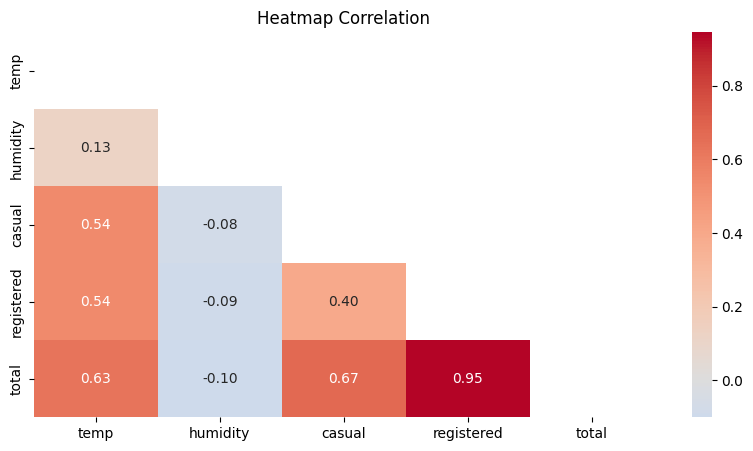

In [ ]:
correlation_matrix = df_day[['temp', 'humidity', 'casual', 'registered', 'total']].corr()
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
plt.figure(figsize=(10, 5))
sns.heatmap(correlation_matrix, annot=True, mask=mask, cmap='coolwarm', center=0, fmt=".2f")
plt.title("Heatmap Correlation")
plt.show()

Gambar yang Anda berikan adalah sebuah heatmap korelasi, yang digunakan untuk menunjukkan hubungan korelasi antara beberapa variabel dalam dataset. Berikut adalah penjelasan berdasarkan heatmap yang terlihat:

### Penjelasan Heatmap:
- Sumbu X dan Y: Menampilkan variabel-variabel yang dibandingkan, yaitu `temp` (suhu), `humidity` (kelembaban), `casual` (pengguna tidak terdaftar), `registered` (pengguna terdaftar), dan `total` (total penggunaan).
  
- Warna:
  - Warna merah menggambarkan korelasi positif yang kuat, semakin mendekati 1.0 semakin kuat korelasinya.
  - Warna biru atau mendekati putih menggambarkan korelasi negatif atau korelasi yang sangat lemah.
  
- Nilai Numerik: Angka-angka yang muncul dalam kotak-kotak menunjukkan nilai koefisien korelasi (r) antara dua variabel:
  - Nilai 1 berarti korelasi sempurna positif.
  - Nilai -1 berarti korelasi sempurna negatif.
  - Nilai 0 menunjukkan tidak ada korelasi.

### Analisis Korelasi dari Heatmap:
1. Korelasi antara `temp` (suhu) dan variabel lain:
   - Suhu memiliki korelasi positif yang sedang dengan jumlah total penggunaan `total` (0.63), pengguna `casual` (0.54), dan pengguna `registered` (0.54).
   - Korelasi dengan kelembaban `humidity` sangat lemah (0.13).

2. Korelasi antara `humidity` (kelembaban) dan variabel lain:
   - Kelembaban memiliki korelasi negatif yang lemah dengan jumlah total penggunaan `total` (-0.10) dan pengguna `casual` (-0.08). Ini menunjukkan bahwa saat kelembaban meningkat, penggunaan cenderung sedikit menurun.
   - Korelasi negatif lemah juga terlihat dengan pengguna `registered` (-0.09), menunjukkan tren serupa.

3. Korelasi antara `casual` (pengguna tidak terdaftar) dan variabel lain:
   - Pengguna `casual` memiliki korelasi positif yang kuat dengan jumlah total penggunaan `total` (0.67), artinya pengguna casual mempengaruhi secara signifikan jumlah total penggunaan.
   - Korelasi sedang dengan `registered` (0.40), menunjukkan hubungan sedang antara jumlah pengguna tidak terdaftar dan terdaftar.

4. Korelasi antara `registered` (pengguna terdaftar) dan variabel lain:
   - Pengguna terdaftar memiliki korelasi sangat kuat dengan jumlah total penggunaan `total` (0.95), artinya pengguna terdaftar sangat mendominasi dalam total penggunaan sistem.
   - Korelasi rendah dengan `humidity` dan cukup signifikan dengan `casual`.

## Exploratory Data Analysis (EDA)

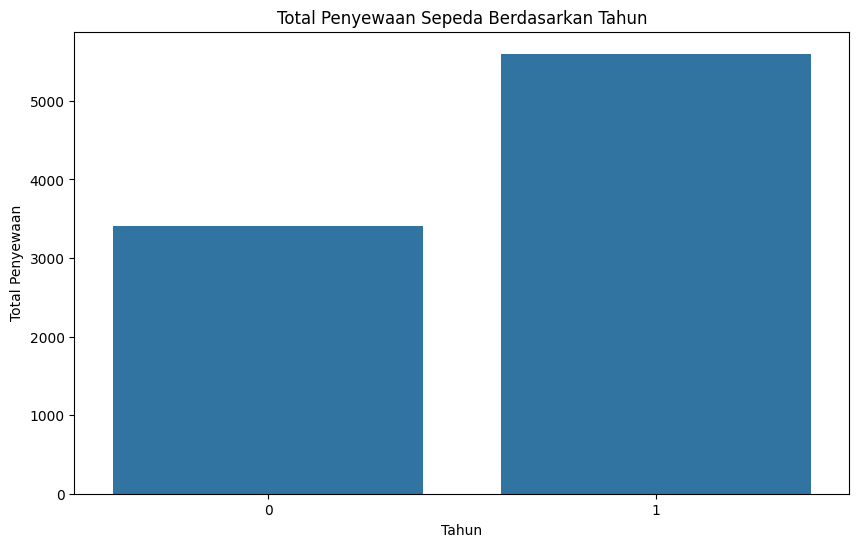

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df_day, x='year', y='total', ci=None)
plt.title('Total Penyewaan Sepeda Berdasarkan Tahun')
plt.xlabel('Tahun')
plt.ylabel('Total Penyewaan')
plt.show()

- Sumbu X (Tahun):
  - Nilai 0 mewakili tahun 2011.
  - Nilai 1 mewakili tahun 2012.

- Sumbu Y (Total Penyewaan): Menunjukkan jumlah total penyewaan sepeda dalam sistem untuk masing-masing tahun.

### Penjelasan Grafik:
1. Tahun 2011 (0):
   - Total penyewaan sepeda lebih rendah dibandingkan dengan tahun 2012. Ini menunjukkan bahwa pada tahun 2011, sistem penyewaan sepeda belum mencapai puncak potensinya.

2. Tahun 2012 (1):
   - Total penyewaan sepeda meningkat secara signifikan dibandingkan dengan tahun 2011. Ini menunjukkan adanya peningkatan jumlah pengguna yang menggunakan layanan penyewaan sepeda, mungkin karena lebih banyak orang yang mengetahui sistem ini atau adanya perbaikan dalam layanan.

## Visualization & Explanatory Analysis

### Pertanyaan 1:

Apa faktor-faktor utama yang mempengaruhi tingkat penggunaan sepeda pada waktu-waktu tertentu?

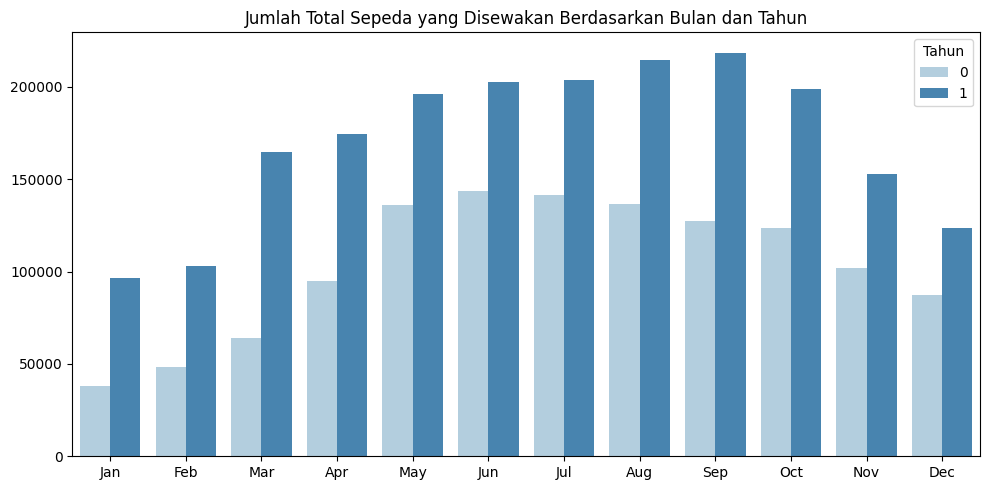

In [ ]:
df_day['month'] = pd.Categorical(df_day['month'], categories=
    ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'],
    ordered=True)

monthly_total = df_day.groupby(by=["month", "year"]).agg({
    "total": "sum"
}).reset_index()

plt.figure(figsize=(10, 5))
sns.barplot(
    data=monthly_total,
    x="month",
    y="total",
    hue="year",
    palette="Blues"
)

plt.title("Jumlah Total Sepeda yang Disewakan Berdasarkan Bulan dan Tahun")
plt.xlabel(None)
plt.ylabel(None)
plt.legend(title="Tahun", loc="upper right")
plt.tight_layout()
plt.show()

1. Musim dan Cuaca
Musim panas (summer) cenderung memiliki tingkat penggunaan sepeda yang lebih tinggi dibandingkan dengan musim dingin. Dalam grafik, bulan-bulan seperti Juni hingga September menunjukkan penggunaan sepeda yang sangat tinggi. Ini bisa dikaitkan dengan kondisi cuaca yang lebih hangat dan nyaman untuk bersepeda.
Cuaca ekstrem seperti hujan lebat, salju, atau suhu yang sangat panas atau sangat dingin dapat mengurangi penggunaan sepeda. Masyarakat cenderung lebih enggan bersepeda dalam kondisi cuaca buruk.

2. Hari Kerja vs Akhir Pekan
Penggunaan sepeda sering kali lebih tinggi pada hari kerja (weekday), terutama pada jam-jam sibuk seperti pagi dan sore hari ketika orang berangkat dan pulang dari tempat kerja. Ini berkaitan dengan penggunaan sepeda sebagai alat transportasi.
Akhir pekan mungkin juga menunjukkan tingkat penggunaan sepeda yang tinggi, tetapi lebih terfokus pada aktivitas rekreasi atau olahraga.

### Pertanyaan 2:

Bagaimana pola penggunaan sepeda bervariasi antara hari kerja dan akhir pekan?

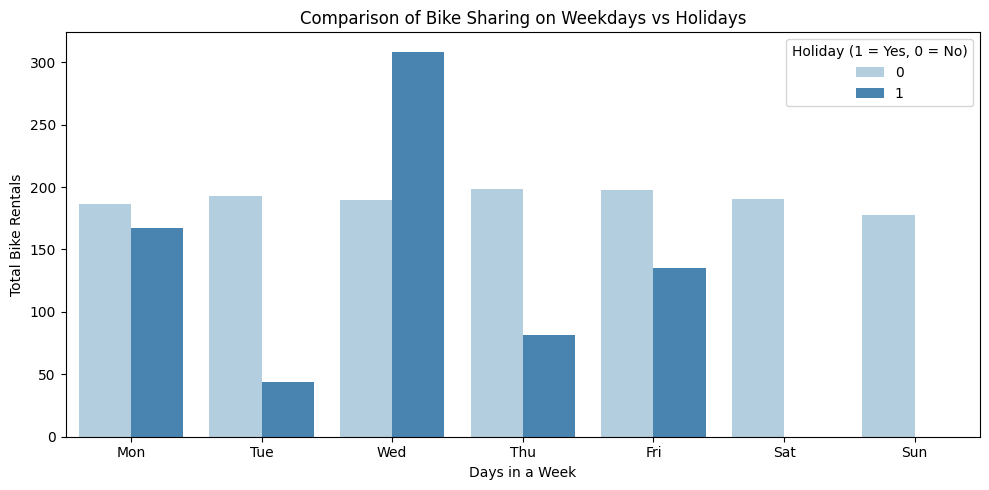

In [ ]:
plt.figure(figsize=(10, 5))
sns.barplot(
    data=df_hour,
    x ='weekday',
    y ='total',
    hue='holiday',  # Compare between holidays and non-holidays
    ci=None,
    order=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'],
    palette='Blues'
)
plt.title('Comparison of Bike Sharing on Weekdays vs Holidays')
plt.xlabel('Days in a Week')
plt.ylabel('Total Bike Rentals')
plt.legend(title="Holiday (1 = Yes, 0 = No)", loc='upper right')
plt.tight_layout()
plt.show()

Pola Penggunaan Sepeda:
1. Hari Kerja (Senin - Jumat):
Penggunaan pada hari kerja cenderung lebih tinggi secara keseluruhan dibandingkan dengan akhir pekan.
Puncak penggunaan terjadi pada hari Rabu untuk hari kerja, terutama pada hari non-libur (diwakili oleh warna biru muda). Hal ini mungkin terkait dengan puncak aktivitas selama pertengahan minggu ketika banyak orang pergi bekerja atau beraktivitas rutin.
Hari Jumat menunjukkan sedikit penurunan dalam penggunaan, yang mungkin terkait dengan transisi menuju akhir pekan.
Akhir Pekan (Sabtu dan Minggu):

2. Pada akhir pekan, penggunaan sepeda cenderung lebih rendah dibandingkan dengan hari kerja, terutama pada hari Minggu.
Hari Sabtu juga menunjukkan penggunaan yang cukup konsisten, namun tetap lebih rendah daripada hari kerja.
Pada akhir pekan, ada sedikit penggunaan pada hari libur (ditandai dengan warna biru tua), karena orang mungkin lebih memilih untuk beristirahat atau melakukan aktivitas rekreasi lainnya.
Perbandingan antara Hari Libur dan Hari Biasa:

3. Penggunaan sepeda pada hari kerja lebih tinggi pada hari non-libur (warna biru muda), sementara penggunaan sepeda pada hari libur cenderung lebih rendah, terutama pada hari Kamis dan Jumat.
Hari libur yang jatuh pada hari kerja tidak menunjukkan lonjakan besar dalam penggunaan sepeda, yang mungkin mengindikasikan bahwa orang lebih memilih untuk tidak menggunakan sepeda pada hari libur.

## Conclusion

1. Apa faktor-faktor utama yang mempengaruhi tingkat penggunaan sepeda pada waktu-waktu tertentu?
Tingkat penggunaan sepeda dipengaruhi oleh kombinasi dari faktor cuaca, musim, aksesibilitas, dan pola perjalanan harian, serta kebijakan pemerintah yang mendukung infrastruktur bersepeda. Dari data grafik, kita dapat melihat bahwa musim panas cenderung menjadi waktu dengan penggunaan sepeda yang paling tinggi, sementara penggunaan berkurang signifikan selama musim dingin dan cuaca buruk.

---


2. Bagaimana pola penggunaan sepeda bervariasi antara hari kerja dan akhir pekan?
- Hari kerja menunjukkan penggunaan sepeda yang lebih tinggi, terutama pada pertengahan minggu (Rabu), yang dapat dihubungkan dengan aktivitas rutin seperti perjalanan kerja.
- Akhir pekan dan hari libur menunjukkan penurunan penggunaan sepeda, terutama pada hari Minggu dan ketika ada hari libur.
- Pola ini menunjukkan bahwa sepeda lebih sering digunakan sebagai alat transportasi selama hari kerja dibandingkan dengan hari-hari libur, di mana aktivitas rekreasi mungkin lebih banyak dilakukan.



## Analisis Lanjutan (Opsional)

RFM Implementation for Bike Sharing Data

In [ ]:
df_day['dateday'] = pd.to_datetime(df_day['dateday'])

latest_date = df_day['dateday'].max()
df_rfm = df_day.groupby('dateday').agg({
    'total': 'sum',
    'registered': 'sum'
}).reset_index()

df_rfm['recency'] = (latest_date - df_rfm['dateday']).dt.days
df_rfm['frequency'] = df_rfm['registered']
df_rfm['monetary'] = df_rfm['total']

df_rfm['R_score'] = pd.qcut(df_rfm['recency'], 4, labels=[4, 3, 2, 1])
df_rfm['F_score'] = pd.qcut(df_rfm['frequency'].rank(method='first'), 4, labels=[1, 2, 3, 4])
df_rfm['M_score'] = pd.qcut(df_rfm['monetary'].rank(method='first'), 4, labels=[1, 2, 3, 4])

df_rfm['RFM_Segment'] = df_rfm['R_score'].astype(str) + df_rfm['F_score'].astype(str) + df_rfm['M_score'].astype(str)
df_rfm['RFM_Score'] = df_rfm[['R_score', 'F_score', 'M_score']].sum(axis=1)

print(df_rfm[['dateday', 'recency', 'frequency', 'monetary', 'RFM_Segment', 'RFM_Score']])


       dateday  recency  frequency  monetary RFM_Segment  RFM_Score
0   2011-01-01      730        654       985         111          3
1   2011-01-02      729        670       801         111          3
2   2011-01-03      728       1229      1349         111          3
3   2011-01-04      727       1454      1562         111          3
4   2011-01-05      726       1518      1600         111          3
..         ...      ...        ...       ...         ...        ...
726 2012-12-27        4       1867      2114         411          6
727 2012-12-28        3       2451      3095         411          6
728 2012-12-29        2       1182      1341         411          6
729 2012-12-30        1       1432      1796         411          6
730 2012-12-31        0       2290      2729         411          6

[731 rows x 6 columns]


Clustering: Manual Grouping & Binning

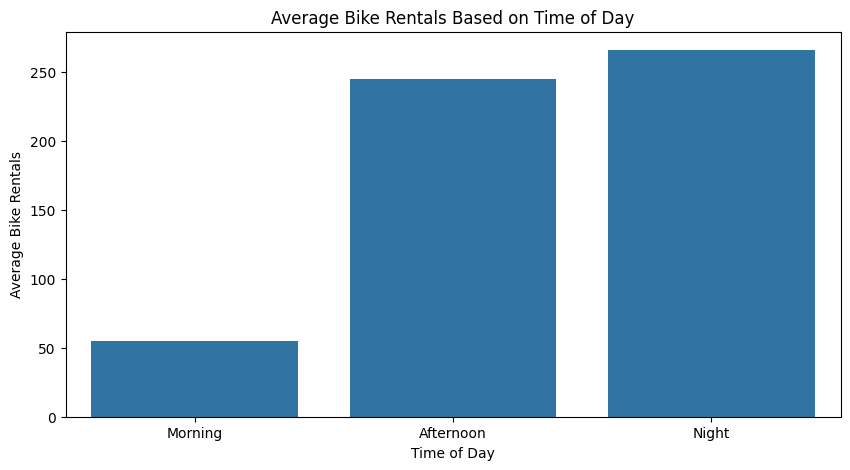

In [ ]:
bins = [0, 8, 16, 24]
labels = ['Morning', 'Afternoon', 'Night']
df_hour['time_of_day'] = pd.cut(df_hour['hour'], bins=bins, labels=labels, right=False)
grouped_data = df_hour.groupby('time_of_day').agg({
    'total': 'mean'
}).reset_index()
plt.figure(figsize=(10, 5))
sns.barplot(x='time_of_day', y='total', data=grouped_data)
plt.title('Average Bike Rentals Based on Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Average Bike Rentals')
plt.show()

Grafik di atas menunjukkan rata-rata penyewaan sepeda berdasarkan waktu dalam sehari, yang dibagi menjadi tiga kategori: Morning (pagi), Afternoon (siang), dan Night (malam). Berikut adalah penjelasan dari hasil tersebut:

1. Morning (Pagi)
   - Rata-rata penyewaan sepeda di pagi hari relatif rendah, sekitar 50 sepeda.
   - Ini mungkin menunjukkan bahwa orang-orang kurang menggunakan sepeda di pagi hari, yang bisa disebabkan oleh aktivitas sibuk seperti persiapan untuk bekerja atau sekolah.

2. Afternoon (Siang)
   - Pada siang hari, penyewaan sepeda meningkat signifikan dengan rata-rata sekitar 250 penyewaan.
   - Waktu siang kemungkinan besar adalah waktu ketika orang-orang lebih santai, mungkin untuk makan siang atau melakukan perjalanan yang lebih ringan, sehingga penyewaan sepeda meningkat.

3. Night (Malam)
   - Penyewaan sepeda di malam hari juga sangat tinggi, mirip dengan penyewaan di siang hari, dengan rata-rata sedikit di atas 250 penyewaan.
   - Pada malam hari, orang mungkin menggunakan sepeda untuk pulang dari tempat kerja atau melakukan aktivitas rekreasi lainnya, sehingga penggunaan sepeda tetap tinggi.

Kesimpulan:
- Afternoon dan Night adalah waktu dengan penyewaan sepeda tertinggi, yang menunjukkan bahwa orang lebih banyak menggunakan sepeda di waktu-waktu ini.
- Morning adalah waktu dengan penggunaan sepeda paling rendah, yang bisa disebabkan oleh prioritas lain yang membuat orang tidak memilih bersepeda pada pagi hari.

Grafik ini membantu dalam memahami pola penggunaan sepeda sepanjang hari dan dapat digunakan untuk mengoptimalkan ketersediaan sepeda di waktu-waktu tertentu.

In [ ]:
df_day.to_csv('df_day_analisis.csv', index=False)
df_hour.to_csv('df_hour_analisis.csv', index=False)
df_rfm.to_csv('df_rfm_analisis.csv', index=False)